In [134]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statistics import median
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [92]:
iris=pd.read_csv('iris_flowers.csv')

In [93]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa
5,5.4,3.9,1.7,0.4,iris_setosa
6,4.6,3.4,1.4,0.3,iris_setosa
7,5.0,3.4,1.5,0.2,iris_setosa
8,4.4,2.9,1.4,0.2,iris_setosa
9,4.9,3.1,1.5,0.1,iris_setosa


In [94]:
iris.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length   petal_width           class
0             5.1          3.5           1.4           0.2     iris_setosa
1             4.9          3.0           1.4           0.2     iris_setosa
2             4.7          3.2           1.3           0.2     iris_setosa
3             4.6          3.1           1.5           0.2     iris_setosa
4             5.0          3.6           1.4           0.2     iris_setosa
..            ...          ...           ...           ...             ...
145           6.7          3.0           5.2           2.3  iris_virginica
146           6.3          2.5           5.0           1.9  iris_virginica
147           6.5          3.0           5.2           2.0  iris_virginica
148           6.2          3.4           5.4           2.3  iris_virginica
149           5.9          3.0           5.1           1.8  iris_virginica

[150 rows x 5 columns]>

In [95]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', ' petal_width', 'class'], dtype='object')

In [97]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
 petal_width    float64
class            object
dtype: object

In [98]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [99]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
 petal_width    0
class           0
dtype: int64

In [100]:
iris['class'].unique()

array(['iris_setosa', 'iris_versicolor', 'iris_virginica'], dtype=object)

PERFORMING EDA

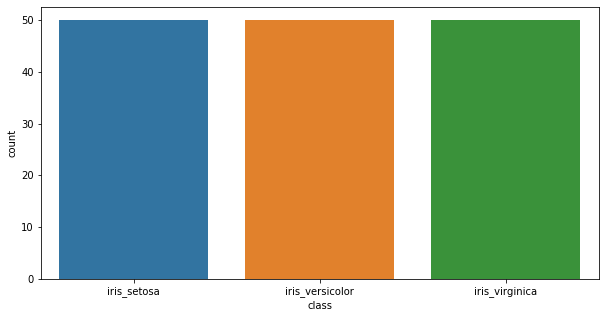

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(iris['class'])

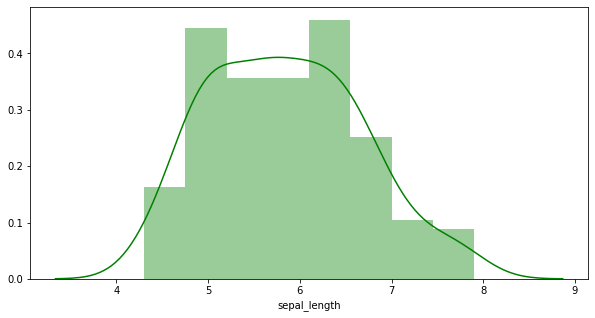

In [102]:
plt.figure(figsize=(10, 5))
sns.distplot(iris['sepal_length'],kde=True,color='green')

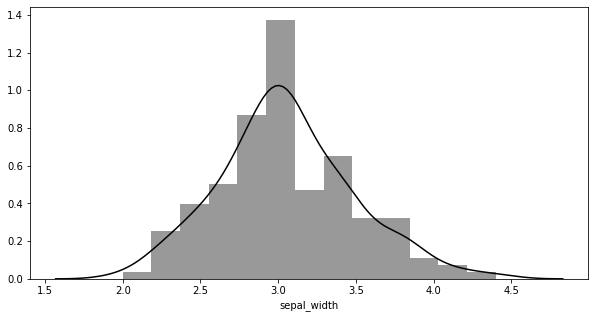

In [103]:
plt.figure(figsize=(10, 5))
sns.distplot(iris['sepal_width'],kde=True,color='black')

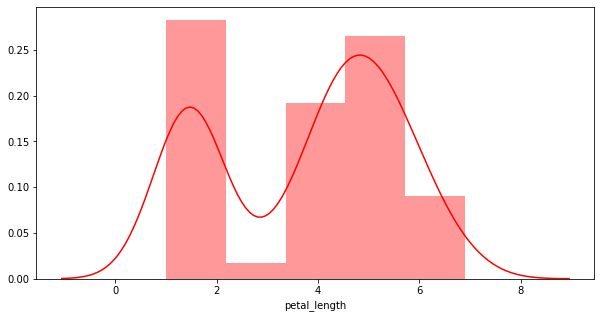

In [104]:
plt.figure(figsize=(10, 5))
sns.distplot(iris['petal_length'],kde=True,color='red')

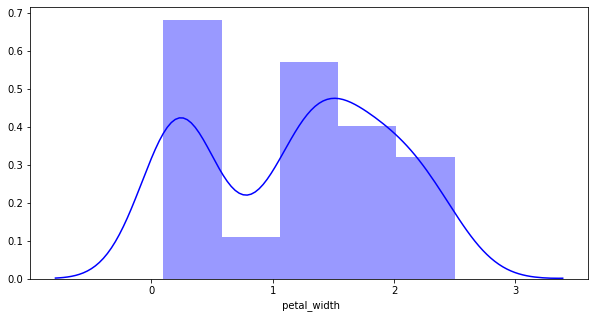

In [105]:
plt.figure(figsize=(10, 5))
sns.distplot(iris[' petal_width'],kde=True,color='blue')

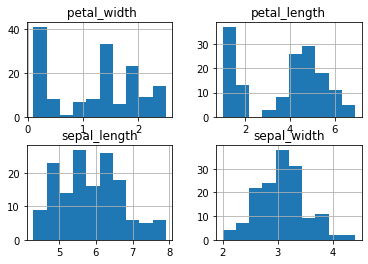

In [106]:
iris.hist()
plt.show()

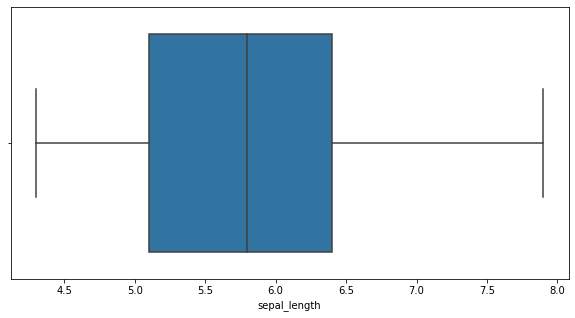

In [107]:
sns.boxplot(iris['sepal_length'])
plt.gcf().set_size_inches(10, 5)

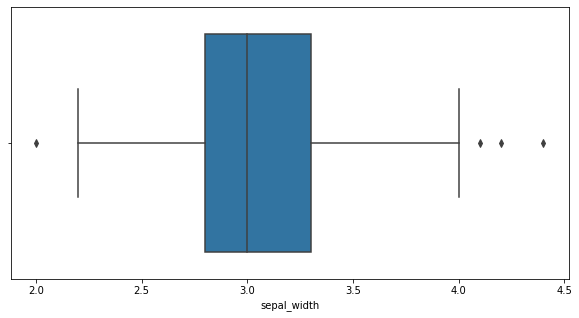

In [108]:
sns.boxplot(iris['sepal_width'])
plt.gcf().set_size_inches(10, 5)

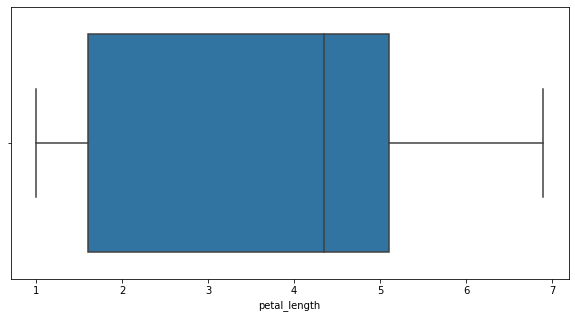

In [109]:
sns.boxplot(iris['petal_length'])
plt.gcf().set_size_inches(10, 5)

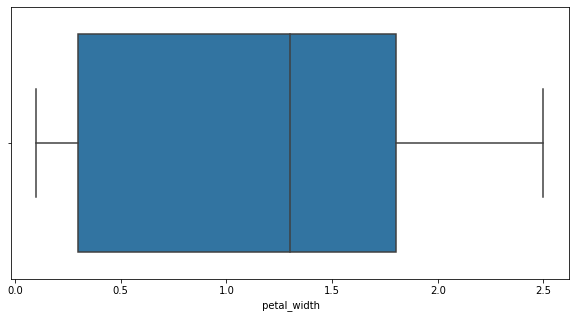

In [110]:
sns.boxplot(iris[' petal_width'])
plt.gcf().set_size_inches(10, 5)

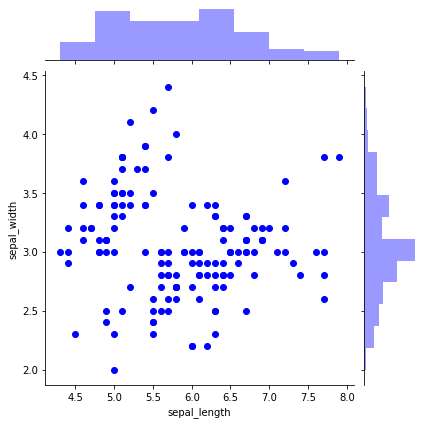

In [111]:
sns.jointplot(x="sepal_length",y="sepal_width",data=iris,color='blue')

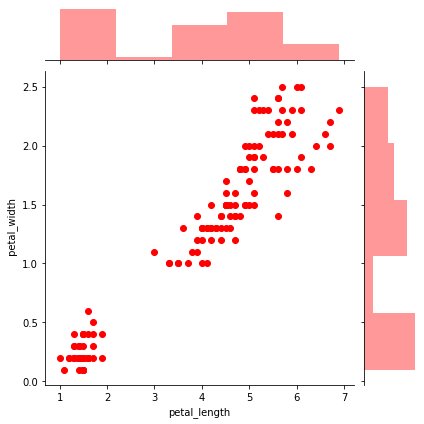

In [112]:
sns.jointplot(x="petal_length",y=" petal_width",data=iris,color='red')

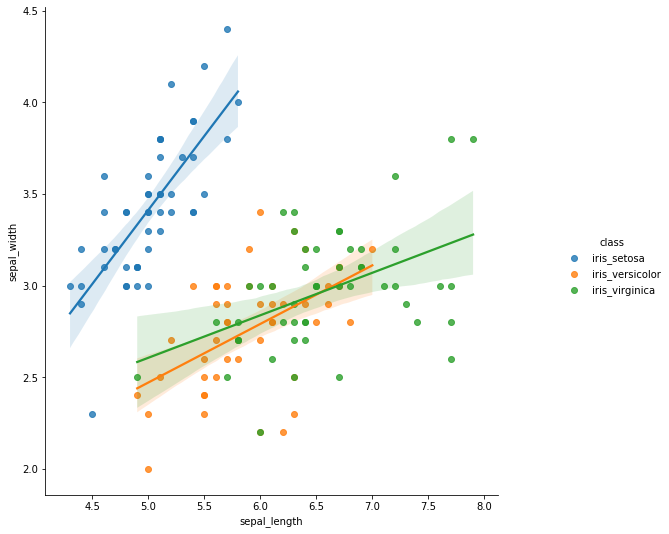

In [113]:
sns.lmplot('sepal_length', 'sepal_width', data=iris, hue='class')
plt.gcf().set_size_inches(10, 8)

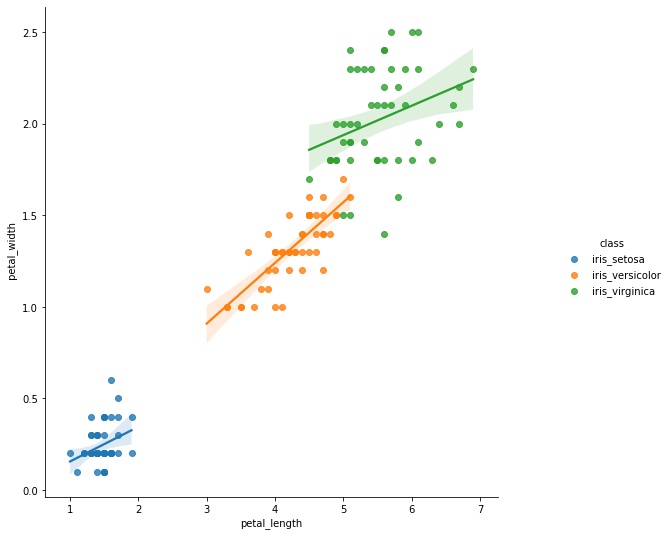

In [114]:
sns.lmplot('petal_length', ' petal_width', data=iris, hue='class')
plt.gcf().set_size_inches(10, 8)

In [115]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


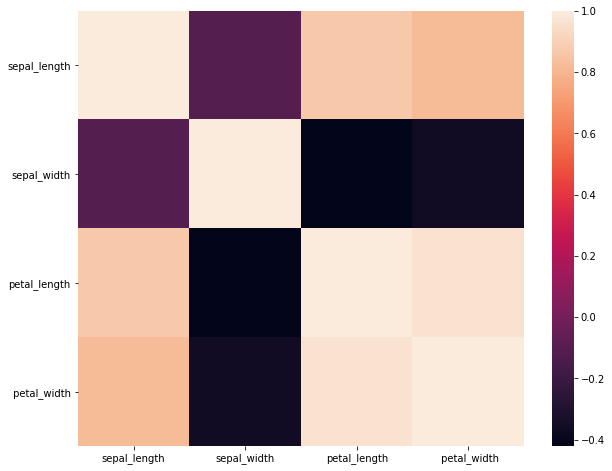

In [116]:
sns.heatmap(iris.corr())
plt.gcf().set_size_inches(10,8)

In [117]:
le=preprocessing.LabelEncoder()
iris['class']=le.fit_transform(iris['class'])


In [118]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


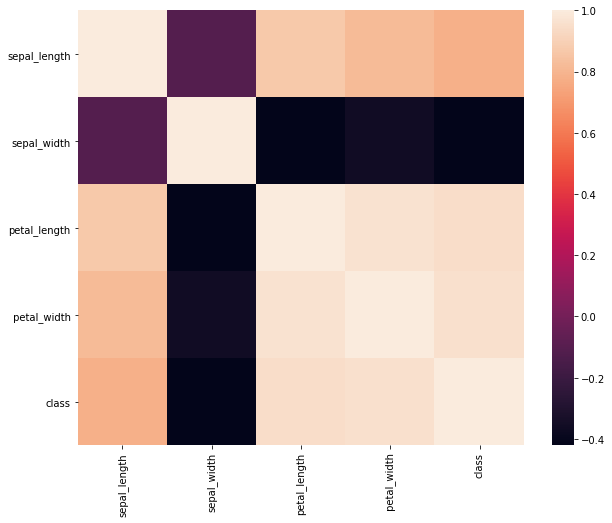

In [119]:
sns.heatmap(iris.corr())
plt.gcf().set_size_inches(10,8)

CHANGING THE OUTLIERS VALUE INSTEAD OF REMOVING THEM FROM THE DATA

In [120]:
iris[iris.sepal_width>4]

,sepal_length,sepal_width,petal_length,petal_width,class
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0


In [121]:
med=median(iris.sepal_width)

In [122]:
iris["sepal_width"] = np.where(iris["sepal_width"] >4, med,iris["sepal_width"])

In [123]:
iris.sepal_width.head(40)

0     3.5
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     3.4
7     3.4
8     2.9
9     3.1
10    3.7
11    3.4
12    3.0
13    3.0
14    4.0
15    3.0
16    3.9
17    3.5
18    3.8
19    3.8
20    3.4
21    3.7
22    3.6
23    3.3
24    3.4
25    3.0
26    3.4
27    3.5
28    3.4
29    3.2
30    3.1
31    3.4
32    3.0
33    3.0
34    3.1
35    3.2
36    3.5
37    3.1
38    3.0
39    3.4
Name: sepal_width, dtype: float64

In [124]:
x=iris.drop('class',axis=1)
y=iris['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=4)

In [126]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
pred1=model.predict(x_test)
accu1=accuracy_score(y_test,pred1)
print(accu*100)

100.0


In [127]:
model=RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)
pred2=model.predict(x_test)
accu2=accuracy_score(y_test,pred2)
print(accu2*100)

93.33333333333333


In [128]:
model=SVC()
model.fit(x_train,y_train)
pred3=model.predict(x_test)
accu3=accuracy_score(y_test,pred3)
print(accu3*100)

98.33333333333333


In [129]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
pred4=model.predict(x_test)
accu4=accuracy_score(y_test,pred4)
print(accu4*100)

98.33333333333333


USING THE SVM ON THE SAME DATASET FRO CLASSIFCATION AND PRINTING CONFUSION MATRIX AND CLASSIFICATION REPORT

In [131]:
model=SVC()
model.fit(x_train,y_train)
p=model.predict(x)
ac=accuracy_score(y,p)
print(ac*100)

97.33333333333334


In [132]:
print(confusion_matrix(y, p))
print(classification_report(y, p))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

